In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
df = pd.read_csv("titanic survival.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()


,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [132]:
 df.drop('Survived',axis='columns')
target = df.Survived


In [133]:
dummies = pd.get_dummies(df.Sex)
dummies.head(3)


,female,male
0,0,1
1,1,0
2,1,0


In [134]:
df = pd.concat([df,dummies],axis='columns')
df.head(3)


,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0


In [135]:
df.drop(['Sex','male'],axis='columns',inplace=True)
df.head(3)

,Survived,Pclass,Age,Fare,female
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1


In [136]:
#to understand the data
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
female        0
dtype: int64

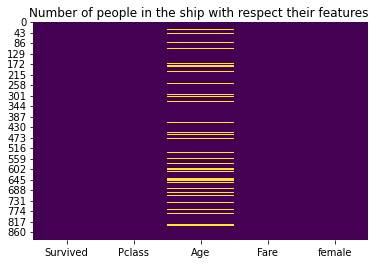

In [137]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Number of people in the ship with respect their features ')
plt.show()

In [138]:
df.columns[df.isna().any()]

Index(['Age'], dtype='object')

In [139]:
df.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [140]:
df.Age = df.Age.fillna(df.Age.mean())
df.head()

,Survived,Pclass,Age,Fare,female
0,0,3,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,1
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


In [141]:
#categorical data into numerical data

#gender = {'male': 0, 'female': 1}
#df['Sex'] = df['Sex'].map(gender)

#df.head()

In [142]:
#to understand the data
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
female      0
dtype: int64

In [143]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
female      0
dtype: int64

In [144]:
from sklearn.model_selection import train_test_split



In [145]:
X =df.drop('Survived', axis = 1)
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.33,random_state = 42)                            
X_train.shape

(596, 4)

In [146]:
#categorical data into numerical data

#gender = {'male': 0, 'female': 1}
#df['Sex'] = df['Sex'].map(gender)

In [147]:
X_train.head()

,Pclass,Age,Fare,female
6,1,54.000000,51.8625,0
718,3,29.699118,15.5000,0
685,2,25.000000,41.5792,0
73,3,26.000000,14.4542,0
882,3,22.000000,10.5167,1


In [148]:
y_train[:10]

/tmp/ipykernel_5951/891270224.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[:10]


6      0
718    0
685    0
73     0
882    0
328    1
453    1
145    0
234    0
220    1
Name: Survived, dtype: int64

In [149]:
from sklearn.linear_model import LogisticRegression

In [150]:
#instantiate model
#random state allows to get the same results -for consistency

lr= LogisticRegression(random_state=42)


In [151]:
#fit the model

lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [152]:
#getting predictions using model

y_predlr=lr.predict(X_test)

In [153]:
#getting accuracy

lr.score(X_test,y_test)

0.8033898305084746

In [154]:
from sklearn.metrics import accuracy_score

In [155]:
score = accuracy_score(y_test,y_predlr)

In [156]:
print(f'Baseline accuracy score {round(score * 100,0)}%')

Baseline accuracy score 80.0%


In [157]:
#applying standardization-subtract the value from mean then it will divide each value by the column standard deviation

from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()

In [159]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

In [160]:
y_predlr2=lr.predict(X_test_s)

/home/tanisha/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [161]:
X_test_s

array([[ 0.87259808, -0.02139539, -0.3825332 , -0.7599606 ],
       [-0.29218216,  0.07781771, -0.48599291, -0.7599606 ],
       [ 0.87259808, -0.76110835, -0.5421286 , -0.7599606 ],
       ...,
       [ 0.87259808, -2.21016245, -0.37172244,  1.3158577 ],
       [ 0.87259808, -0.02139539, -0.3825332 ,  1.3158577 ],
       [ 0.87259808, -0.68484234, -0.5421286 , -0.7599606 ]])

In [162]:
lr.score(X_test_s,y_test)

/home/tanisha/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.7830508474576271

In [163]:
X_train.head()

,Pclass,Age,Fare,female
6,1,54.000000,51.8625,0
718,3,29.699118,15.5000,0
685,2,25.000000,41.5792,0
73,3,26.000000,14.4542,0
882,3,22.000000,10.5167,1


In [164]:
#binary
lr.classes_


array([0, 1])

In [165]:
lr.coef_

array([[-9.29250318e-01, -2.43235715e-02,  1.69848251e-03,
         2.33742594e+00]])

In [166]:
lr.intercept_

array([1.34994061])

In [167]:
columns = X_train.columns

In [168]:
coefficients = pd.Series(lr.coef_[0],columns)
coefficients

Pclass   -0.929250
Age      -0.024324
Fare      0.001698
female    2.337426
dtype: float64

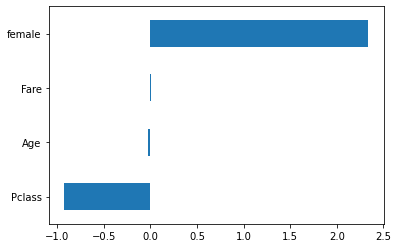

In [172]:
import pandas as pd
import matplotlib
from matplotlib.pyplot import plot
%matplotlib inline

coefficients.sort_values().plot(kind='barh');